In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as dr
import matplotlib.pyplot as mpl

## consumer defensive
dg = dr.get_data_yahoo('DG', '2019-01-01')
wmt = dr.get_data_yahoo('WMT', '2019-01-01')
## utilities
##ngg = ##National Grid plc
##ed = ##Consolidated Edison, Inc.

## energy
##xom
##tot

## tech
# csco = ##Cisco Systems, Inc.
# crm = ##salesforce.com, inc.

dg.head()
wmt.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,93.650002,91.639999,91.639999,93.339996,8152700.0,92.840446
2019-01-03,94.709999,92.699997,93.209999,92.860001,8266700.0,92.363022
2019-01-04,93.660004,92.690002,93.209999,93.440002,8029100.0,92.939919
2019-01-07,95.169998,93.180000,93.620003,94.540001,7789700.0,94.034035
2019-01-08,95.760002,93.910004,95.059998,95.199997,7200900.0,94.690498


In [4]:
import csv
import datetime
import re

import pandas as pd
import requests
import codecs

In [5]:
def get_google_finance_intraday(ticker, period=60, days=1):
    """
    Retrieve intraday stock data from Google Finance.
    Parameters
    ----------
    ticker : str
        Company ticker symbol.
    period : int
        Interval between stock values in seconds.
    days : int
        Number of days of data to retrieve.
    Returns
    -------
    df : pandas.DataFrame
        DataFrame containing the opening price, high price, low price,
        closing price, and volume. The index contains the times associated with
        the retrieved price values.
    """

    uri = 'http://www.google.com/finance/getprices' \
          '?i={period}&p={days}d&f=d,o,h,l,c,v&df=cpct&q={ticker}'.format(ticker=ticker,
                                                                          period=period,
                                                                          days=days)
    page = requests.get(uri)
    reader = csv.reader(codecs.iterdecode(page.content.splitlines(), "utf-8"))  ##csv.reader(page.content.splitlines())
    columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    rows = []
    times = []
    for row in reader:
        if re.match('^[a\d]', row[0]):
            if row[0].startswith('a'):
                start = datetime.datetime.fromtimestamp(int(row[0][1:]))
                times.append(start)
            else:
                times.append(start+datetime.timedelta(seconds=period*int(row[0])))
            rows.append(map(float, row[1:]))
    if len(rows):
        return pd.DataFrame(rows, index=pd.DatetimeIndex(times, name='Date'),
                            columns=columns)
    else:
        return pd.DataFrame(rows, index=pd.DatetimeIndex(times, name='Date'))

In [6]:
#get_google_finance_intraday(‘RAIN’, 60, 1)

get_google_finance_intraday("DG", 60, 1)

""
Date


In [7]:
## yahoo finance api because it is still available and google finance does not

import requests
import pandas as pd
import arrow
import datetime
##from dateutil.parser import parse
##from dateutil.tz import gettz
##from pprint import pprint
##import urllib,time,datetime

symboldg='DG'

def get_quote_data(symboldg, data_range='120d', data_interval='1h'):
    res = requests.get('https://query1.finance.yahoo.com/v8/finance/chart/{symboldg}?range={data_range}&interval={data_interval}'.format(**locals()))
    data = res.json()
    body = data['chart']['result'][0]    
    dt = datetime.datetime
    dt = pd.Series(map(lambda x: arrow.get(x).to('EST').datetime.replace(tzinfo=None), body['timestamp']), name='dt')
    df = pd.DataFrame(body['indicators']['quote'][0], index=dt)
    dg = pd.DataFrame(body['timestamp'])
    df = df.loc[:, ('open', 'high', 'low', 'close', 'volume')]
    df.dropna(inplace=True)     #removing NaN rows
    df.columns = ['OPEN', 'HIGH','LOW','CLOSE','VOLUME']    #Renaming columns in pandas
    
    return df

dg = get_quote_data(symboldg, '120d', ' 1h').reset_index().sort_values('dt').set_index('dt')
print(isinstance(dg, pd.DataFrame))
print(list(dg))
print (dg)

symbolwmt='WMT'

def get_quote_data(symbolwmt, data_range='120d', data_interval='1h'):
    res = requests.get('https://query1.finance.yahoo.com/v8/finance/chart/{symbolwmt}?range={data_range}&interval={data_interval}'.format(**locals()))
    data = res.json()
    body = data['chart']['result'][0]    
    dt = datetime.datetime
    dt = pd.Series(map(lambda x: arrow.get(x).to('EST').datetime.replace(tzinfo=None), body['timestamp']), name='dt')
    df = pd.DataFrame(body['indicators']['quote'][0], index=dt)
    dg = pd.DataFrame(body['timestamp'])
    df = df.loc[:, ('open', 'high', 'low', 'close', 'volume')]
    df.dropna(inplace=True)     #removing NaN rows
    df.columns = ['OPEN', 'HIGH','LOW','CLOSE','VOLUME']    #Renaming columns in pandas
    
    return df

wmt = get_quote_data(symbolwmt, '120d', ' 1h').reset_index().sort_values('dt').set_index('dt')
print(isinstance(wmt, pd.DataFrame))
print(list(wmt))
print (wmt)


##ngg = ##National Grid plc
symbolngg='NGG'

def get_quote_data(symbolngg, data_range='120d', data_interval='1h'):
    res = requests.get('https://query1.finance.yahoo.com/v8/finance/chart/{symbolngg}?range={data_range}&interval={data_interval}'.format(**locals()))
    data = res.json()
    body = data['chart']['result'][0]    
    dt = datetime.datetime
    dt = pd.Series(map(lambda x: arrow.get(x).to('EST').datetime.replace(tzinfo=None), body['timestamp']), name='dt')
    df = pd.DataFrame(body['indicators']['quote'][0], index=dt)
    dg = pd.DataFrame(body['timestamp'])
    df = df.loc[:, ('open', 'high', 'low', 'close', 'volume')]
    df.dropna(inplace=True)     #removing NaN rows
    df.columns = ['OPEN', 'HIGH','LOW','CLOSE','VOLUME']    #Renaming columns in pandas
    
    return df

ngg = get_quote_data(symbolngg, '120d', ' 1h').reset_index().sort_values('dt').set_index('dt')
print(isinstance(ngg, pd.DataFrame))
print(list(ngg))
print (ngg)



##ed = ##Consolidated Edison, Inc.
symboled='ED'

def get_quote_data(symboled, data_range='120d', data_interval='1h'):
    res = requests.get('https://query1.finance.yahoo.com/v8/finance/chart/{symboled}?range={data_range}&interval={data_interval}'.format(**locals()))
    data = res.json()
    body = data['chart']['result'][0]    
    dt = datetime.datetime
    dt = pd.Series(map(lambda x: arrow.get(x).to('EST').datetime.replace(tzinfo=None), body['timestamp']), name='dt')
    df = pd.DataFrame(body['indicators']['quote'][0], index=dt)
    dg = pd.DataFrame(body['timestamp'])
    df = df.loc[:, ('open', 'high', 'low', 'close', 'volume')]
    df.dropna(inplace=True)     #removing NaN rows
    df.columns = ['OPEN', 'HIGH','LOW','CLOSE','VOLUME']    #Renaming columns in pandas
    
    return df

ed = get_quote_data(symboled, '120d', ' 1h').reset_index().sort_values('dt').set_index('dt')
print(isinstance(ed, pd.DataFrame))
print(list(ed))
print (ed)


##xom
symbolxom='XOM'

def get_quote_data(symbolxom, data_range='120d', data_interval='1h'):
    res = requests.get('https://query1.finance.yahoo.com/v8/finance/chart/{symbolxom}?range={data_range}&interval={data_interval}'.format(**locals()))
    data = res.json()
    body = data['chart']['result'][0]    
    dt = datetime.datetime
    dt = pd.Series(map(lambda x: arrow.get(x).to('EST').datetime.replace(tzinfo=None), body['timestamp']), name='dt')
    df = pd.DataFrame(body['indicators']['quote'][0], index=dt)
    dg = pd.DataFrame(body['timestamp'])
    df = df.loc[:, ('open', 'high', 'low', 'close', 'volume')]
    df.dropna(inplace=True)     #removing NaN rows
    df.columns = ['OPEN', 'HIGH','LOW','CLOSE','VOLUME']    #Renaming columns in pandas
    
    return df

xom = get_quote_data(symbolxom, '120d', ' 1h').reset_index().sort_values('dt').set_index('dt')
print(isinstance(xom, pd.DataFrame))
print(list(xom))
print (xom)


##tot
symboltot='TOT'

def get_quote_data(symboltot, data_range='120d', data_interval='1h'):
    res = requests.get('https://query1.finance.yahoo.com/v8/finance/chart/{symboltot}?range={data_range}&interval={data_interval}'.format(**locals()))
    data = res.json()
    body = data['chart']['result'][0]    
    dt = datetime.datetime
    dt = pd.Series(map(lambda x: arrow.get(x).to('EST').datetime.replace(tzinfo=None), body['timestamp']), name='dt')
    df = pd.DataFrame(body['indicators']['quote'][0], index=dt)
    dg = pd.DataFrame(body['timestamp'])
    df = df.loc[:, ('open', 'high', 'low', 'close', 'volume')]
    df.dropna(inplace=True)     #removing NaN rows
    df.columns = ['OPEN', 'HIGH','LOW','CLOSE','VOLUME']    #Renaming columns in pandas
    
    return df

tot = get_quote_data(symboltot, '120d', ' 1h').reset_index().sort_values('dt').set_index('dt')
print(isinstance(tot, pd.DataFrame))
print(list(tot))
print (tot)

## tech
# csco = ##Cisco Systems, Inc.
symbolcsco='CSCO'

def get_quote_data(symbolcsco, data_range='120d', data_interval='1h'):
    res = requests.get('https://query1.finance.yahoo.com/v8/finance/chart/{symbolcsco}?range={data_range}&interval={data_interval}'.format(**locals()))
    data = res.json()
    body = data['chart']['result'][0]    
    dt = datetime.datetime
    dt = pd.Series(map(lambda x: arrow.get(x).to('EST').datetime.replace(tzinfo=None), body['timestamp']), name='dt')
    df = pd.DataFrame(body['indicators']['quote'][0], index=dt)
    dg = pd.DataFrame(body['timestamp'])
    df = df.loc[:, ('open', 'high', 'low', 'close', 'volume')]
    df.dropna(inplace=True)     #removing NaN rows
    df.columns = ['OPEN', 'HIGH','LOW','CLOSE','VOLUME']    #Renaming columns in pandas
    
    return df

csco = get_quote_data(symbolcsco, '120d', ' 1h').reset_index().sort_values('dt').set_index('dt')
print(isinstance(csco, pd.DataFrame))
print(list(csco))
print (csco)

# crm = ##salesforce.com, inc.
symbolcrm='CRM'

def get_quote_data(symbolcrm, data_range='120d', data_interval='1h'):
    res = requests.get('https://query1.finance.yahoo.com/v8/finance/chart/{symbolcrm}?range={data_range}&interval={data_interval}'.format(**locals()))
    data = res.json()
    body = data['chart']['result'][0]    
    dt = datetime.datetime
    dt = pd.Series(map(lambda x: arrow.get(x).to('EST').datetime.replace(tzinfo=None), body['timestamp']), name='dt')
    df = pd.DataFrame(body['indicators']['quote'][0], index=dt)
    dg = pd.DataFrame(body['timestamp'])
    df = df.loc[:, ('open', 'high', 'low', 'close', 'volume')]
    df.dropna(inplace=True)     #removing NaN rows
    df.columns = ['OPEN', 'HIGH','LOW','CLOSE','VOLUME']    #Renaming columns in pandas
    
    return df

crm = get_quote_data(symbolcrm, '120d', ' 1h').reset_index().sort_values('dt').set_index('dt')
print(isinstance(crm, pd.DataFrame))
print(list(crm))
print (crm)

# nflx = ##Netflix
symbolnflx='NFLX'

def get_quote_data(symbolnflx, data_range='120d', data_interval='1h'):
    res = requests.get('https://query1.finance.yahoo.com/v8/finance/chart/{symbolnflx}?range={data_range}&interval={data_interval}'.format(**locals()))
    data = res.json()
    body = data['chart']['result'][0]    
    dt = datetime.datetime
    dt = pd.Series(map(lambda x: arrow.get(x).to('EST').datetime.replace(tzinfo=None), body['timestamp']), name='dt')
    df = pd.DataFrame(body['indicators']['quote'][0], index=dt)
    dg = pd.DataFrame(body['timestamp'])
    df = df.loc[:, ('open', 'high', 'low', 'close', 'volume')]
    df.dropna(inplace=True)     #removing NaN rows
    df.columns = ['OPEN', 'HIGH','LOW','CLOSE','VOLUME']    #Renaming columns in pandas
    
    return df

nflx = get_quote_data(symbolnflx, '120d', ' 1h').reset_index().sort_values('dt').set_index('dt')
print(isinstance(nflx, pd.DataFrame))
print(list(nflx))
print (nflx)

# hon ## Honeywell International Inc.
symbolhon='HON'

def get_quote_data(symbolhon, data_range='120d', data_interval='1h'):
    res = requests.get('https://query1.finance.yahoo.com/v8/finance/chart/{symbolhon}?range={data_range}&interval={data_interval}'.format(**locals()))
    data = res.json()
    body = data['chart']['result'][0]    
    dt = datetime.datetime
    dt = pd.Series(map(lambda x: arrow.get(x).to('EST').datetime.replace(tzinfo=None), body['timestamp']), name='dt')
    df = pd.DataFrame(body['indicators']['quote'][0], index=dt)
    dg = pd.DataFrame(body['timestamp'])
    df = df.loc[:, ('open', 'high', 'low', 'close', 'volume')]
    df.dropna(inplace=True)     #removing NaN rows
    df.columns = ['OPEN', 'HIGH','LOW','CLOSE','VOLUME']    #Renaming columns in pandas
    
    return df

hon = get_quote_data(symbolhon, '120d', ' 1h').reset_index().sort_values('dt').set_index('dt')
print(isinstance(hon, pd.DataFrame))
print(list(hon))
print (hon)



## https://gist.github.com/lebedov/f09030b865c4cb142af1
## https://arrow.readthedocs.io/en/latest/

True
['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
                           OPEN        HIGH         LOW       CLOSE     VOLUME
dt                                                                            
2018-10-19 08:30:00  109.389999  110.000000  109.000000  109.489998   376514.0
2018-10-19 09:30:00  109.529999  109.709999  109.199997  109.410004   165621.0
2018-10-19 10:30:00  109.470001  109.870003  109.150002  109.199997   204335.0
2018-10-19 11:30:00  109.169998  109.614998  109.000000  109.589996   317941.0
2018-10-19 12:30:00  109.580002  110.290001  109.250000  110.139999   354220.0
2018-10-19 13:30:00  110.146400  110.146400  109.519997  109.800003   244402.0
2018-10-19 14:30:00  109.790001  109.940002  109.510002  109.550003   367570.0
2018-10-22 08:30:00  109.940002  110.278603  109.629997  109.779999   279674.0
2018-10-22 09:30:00  109.849998  110.739998  109.790001  110.589996   206434.0
2018-10-22 10:30:00  110.669998  110.669998  110.040001  110.230003   198933.0
2018

True
['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
                          OPEN       HIGH        LOW      CLOSE    VOLUME
dt                                                                       
2018-10-19 08:30:00  54.529999  54.700001  54.459999  54.570000  155627.0
2018-10-19 09:30:00  54.590000  54.740002  54.529999  54.534801  127556.0
2018-10-19 10:30:00  54.529999  54.799999  54.494999  54.779999   68046.0
2018-10-19 11:30:00  54.759998  54.869999  54.700001  54.860001   72164.0
2018-10-19 12:30:00  54.846100  54.846100  54.619999  54.700001   47733.0
2018-10-19 13:30:00  54.709999  54.807301  54.619999  54.700001   59319.0
2018-10-19 14:30:00  54.700001  54.740002  54.669998  54.730000   77976.0
2018-10-22 08:30:00  54.540001  54.820000  54.470001  54.570000  188761.0
2018-10-22 09:30:00  54.529999  54.549999  54.340000  54.340000   91631.0
2018-10-22 10:30:00  54.330002  54.459999  54.299999  54.364799   67626.0
2018-10-22 11:30:00  54.349998  54.470001  54.290001  54.400002 

True
['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
                          OPEN       HIGH        LOW      CLOSE     VOLUME
dt                                                                        
2018-10-19 08:30:00  81.669998  82.290001  81.580002  82.044998  2651323.0
2018-10-19 09:30:00  82.078499  82.463600  82.025002  82.260002  1066758.0
2018-10-19 10:30:00  82.260002  82.400002  82.019997  82.165100   899567.0
2018-10-19 11:30:00  82.129997  82.360001  82.080002  82.309998   785062.0
2018-10-19 12:30:00  82.290001  82.330002  81.830002  82.014999   848457.0
2018-10-19 13:30:00  82.014999  82.209999  81.919998  82.110001   974948.0
2018-10-19 14:30:00  82.110001  82.169998  81.955002  81.970001  1333852.0
2018-10-22 08:30:00  82.000000  82.180000  80.930000  81.050003  1846339.0
2018-10-22 09:30:00  81.059998  81.349998  80.959999  81.135002  1231272.0
2018-10-22 10:30:00  81.110001  81.178497  80.800003  80.949997   807555.0
2018-10-22 11:30:00  80.959999  80.995003  80.705002

True
['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
                          OPEN       HIGH        LOW      CLOSE     VOLUME
dt                                                                        
2018-10-19 08:30:00  45.480000  46.099998  45.480000  46.060001  5105252.0
2018-10-19 09:30:00  46.060001  46.200001  45.889999  45.889999  2356923.0
2018-10-19 10:30:00  45.889999  45.915001  45.279999  45.310001  2158963.0
2018-10-19 11:30:00  45.320000  45.565102  45.134998  45.565102  2176803.0
2018-10-19 12:30:00  45.529999  45.580002  45.240002  45.500000  1554976.0
2018-10-19 13:30:00  45.490002  45.639999  45.410000  45.630001  1729199.0
2018-10-19 14:30:00  45.610001  45.660000  45.320000  45.320000  5868784.0
2018-10-22 08:30:00  45.650002  45.730000  45.410000  45.509998  4430996.0
2018-10-22 09:30:00  45.480000  46.275002  45.459999  46.154999  2879600.0
2018-10-22 10:30:00  46.139999  46.180000  45.730000  45.810001  2053048.0
2018-10-22 11:30:00  45.799999  46.029999  45.775002

True
['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
                           OPEN        HIGH         LOW       CLOSE     VOLUME
dt                                                                            
2018-10-19 08:30:00  350.003296  355.769989  349.000000  352.829987  3905492.0
2018-10-19 09:30:00  352.700012  355.100006  349.600006  349.600006  1573028.0
2018-10-19 10:30:00  349.929993  350.000000  341.100006  342.299988  1873148.0
2018-10-19 11:30:00  342.200012  343.707794  339.399994  341.929993  1985188.0
2018-10-19 12:30:00  341.607697  342.649994  334.369995  337.559998  1927942.0
2018-10-19 13:30:00  337.519989  338.000000  333.420013  334.940002  2916635.0
2018-10-19 14:30:00  334.980011  335.000000  332.399994  332.399994  2199075.0
2018-10-22 08:30:00  332.559998  334.339996  320.429993  323.480011  5145396.0
2018-10-22 09:30:00  323.399994  334.320007  322.679993  329.479889  3432878.0
2018-10-22 10:30:00  329.488190  331.200012  325.910004  330.197296  1780372.0
2018

(array([1.538e+18, 1.540e+18, 1.542e+18, 1.544e+18, 1.546e+18, 1.548e+18,
        1.550e+18, 1.552e+18, 1.554e+18, 1.556e+18]),
 <a list of 10 Text xticklabel objects>)

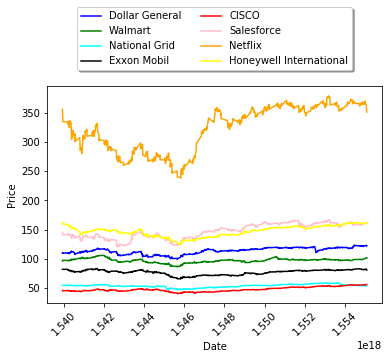

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(dg.index, dg.HIGH, color = 'blue', label="Dollar General")
plt.plot(wmt.index, wmt.HIGH, color = 'green', label="Walmart")
plt.plot(ngg.index, ngg.HIGH, color = 'cyan', label="National Grid")
plt.plot(xom.index, xom.HIGH, color = 'black', label="Exxon Mobil")
plt.plot(csco.index, csco.HIGH, color = 'red', label="CISCO")
plt.plot(crm.index, crm.HIGH, color = 'pink', label="Salesforce")
plt.plot(nflx.index, nflx.HIGH, color = 'orange', label="Netflix")
plt.plot(hon.index, hon.HIGH, color = 'yellow', label="Honeywell International")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),ncol=2, fancybox=True, shadow=True)


plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)

##plt.savefig('my_figure.png')
##plt.show()

##https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot


In [9]:
## Coalation of all stock data:
tickers  = ['DG','WMT','NGG','XOM','CSCO','CRM','NFLX','HON']
allstcks = pd.concat([dg, wmt, ngg, xom, csco,crm,nflx,hon], axis = 1, keys = tickers)
allstcks.columns.names = ['Ticker', 'Stock Information'] 
allstcks

Ticker                       DG                                      \
Stock Information          OPEN        HIGH         LOW       CLOSE   
dt                                                                    
2018-10-19 08:30:00  109.389999  110.000000  109.000000  109.489998   
2018-10-19 09:30:00  109.529999  109.709999  109.199997  109.410004   
2018-10-19 10:30:00  109.470001  109.870003  109.150002  109.199997   
2018-10-19 11:30:00  109.169998  109.614998  109.000000  109.589996   
2018-10-19 12:30:00  109.580002  110.290001  109.250000  110.139999   
2018-10-19 13:30:00  110.146400  110.146400  109.519997  109.800003   
2018-10-19 14:30:00  109.790001  109.940002  109.510002  109.550003   
2018-10-22 08:30:00  109.940002  110.278603  109.629997  109.779999   
2018-10-22 09:30:00  109.849998  110.739998  109.790001  110.589996   
2018-10-22 10:30:00  110.669998  110.669998  110.040001  110.230003   
2018-10-22 11:30:00  110.279999  110.279999  109.879997  109.970001   
2018-10-22 12:30:00  109.940002  110.330002  109.709999  109.752197   
2018-10-22 13:30:00  109.720001  110.315002  109.720001  110.169998   
2018-10-22 14:30:00  110.160004  110.330002  109.970001  110.019997   
2018-10-23 08:30:00  109.160004  109.849998  108.680000  108.839996   
2018-10-23 09:30:00  108.839996  108.970001  108.290001  108.675003   
2018-10-23 10:30:00  108.617599  109.120003  108.379997  109.000000   
2018-10-23 11:30:00  109.050003  109.580002  108.629997  109.550003   
2018-10-23 12:30:00  109.750000  109.900002  109.139999  109.839996   
2018-10-23 13:30:00  109.879997  110.779999  109.879997  110.349998   
2018-10-23 14:30:00  110.349998  110.559998  110.220001  110.400002   
2018-10-24 08:30:00  109.870003  111.839996  109.870003  111.400002   
2018-10-24 09:30:00  111.350098  111.620003  110.489998  111.040001   
2018-10-24 10:30:00  111.050003  112.620003  111.050003  112.540001   
2018-10-24 11:30:00  112.589996  112.639999  111.849998  112.570000   
2018-10-24 12:30:00  112.660004  113.139999  112.125000  113.139999   
2018-10-24 13:30:00  113.169998  113.470001  112.235001  112.349998   
2018-10-24 14:30:00  112.410004  112.610001  110.930000  110.980003   
2018-10-25 08:30:00  111.955002  112.190002  111.489998  111.620003   
2018-10-25 09:30:00  111.690002  111.942802  111.029999  111.942802   
...                         ...         ...         ...         ...   
2019-04-08 13:30:00  122.555000  122.669998  122.269997  122.290001   
2019-04-08 14:30:00  122.290001  122.320000  121.949997  122.290001   
2019-04-09 08:30:00  121.760002  122.260002  121.360001  121.900002   
2019-04-09 09:30:00  121.889999  121.919998  121.000000  121.089996   
2019-04-09 10:30:00  121.110001  121.620003  121.000000  121.394699   
2019-04-09 11:30:00  121.389999  121.589996  121.230003  121.330002   
2019-04-09 12:30:00  121.330002  121.440002  121.099998  121.194000   
2019-04-09 13:30:00  121.190002  121.349998  121.044998  121.239998   
2019-04-09 14:30:00  121.214996  121.529999  121.205002  121.440002   
2019-04-10 08:30:00  121.760002  122.644997  121.614998  121.739998   
2019-04-10 09:30:00  121.730003  122.089996  121.379997  121.820000   
2019-04-10 10:30:00  121.839996  122.389999  121.839996  122.000000   
2019-04-10 11:30:00  122.004997  122.169998  121.900002  122.019997   
2019-04-10 12:30:00  122.014999  122.050003  121.599998  121.739998   
2019-04-10 13:30:00  121.760002  121.940002  121.580002  121.720001   
2019-04-10 14:30:00  121.724998  121.949997  121.580002  121.839996   
2019-04-11 08:30:00  122.320000  122.750000  121.879997  122.209999   
2019-04-11 09:30:00  122.220001  122.677803  122.169998  122.589996   
2019-04-11 10:30:00  122.589996  122.589996  122.029999  122.370003   
2019-04-11 11:30:00  122.379997  122.379997  122.032600  122.120003   
2019-04-11 12:30:00  122.129997  122.260002  122.040001  122.129997   
2019-04-11 13:30:00  122.120003  122.349998  122.029999  122.230003   
2019-04-11 14:30:00  122

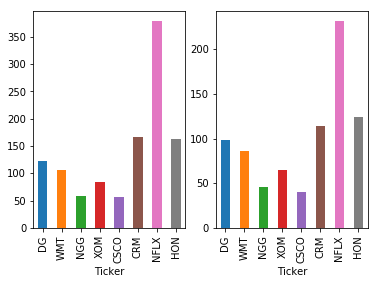

In [12]:
plt.subplot(1, 2, 1)
max_high_value = allstcks.xs(key = 'HIGH', axis = 1, level = 'Stock Information').max()
max_high_value.plot(kind="bar")

plt.subplot(1, 2, 2)
min_low_value = allstcks.xs(key = 'LOW', axis = 1, level = 'Stock Information').min()
min_low_value.plot(kind="bar")

#plt.subplot(1, 3, 3)
#rng = pd.DataFrame(allstcks)
#allstckrng = pd.DataFrame(rng.index, rng.DG.HIGH, rng.DG.LOW)
#allstckrng = rng.iloc[0,0:2].copy()
#print(allstckrng)

#allstcks.xs(key = 'LOW', axis = 1, level = 'Stock Information').min()
#min_low_value.plot(kind="bar")

In [11]:
#plt.subplot(1, 3, 3)
rng = pd.DataFrame(allstcks)
#allstckrng = rng.iloc[0,2:3].copy()
print(allstckrng)


Ticker  Stock Information
DG      OPEN                 109.389999
        HIGH                 110.000000
Name: 2018-10-19 08:30:00, dtype: float64
